様々な一変数関数を入力に与え、予測させる

In [239]:
#学習セットと訓練セットに分割する関数
def divide_train_and_test(X, y, train_ratio):
    num_train = int(X.shape[0] * train_ratio)
    X_train, X_test = X[:num_train], X[num_train:]
    y_train, y_test = y[:num_train], y[num_train:]
    return X_train, X_test, y_train, y_test
    

In [240]:
#累乗の特徴量を作る関数
def make_pow(X, n):
    X = X.tolist()
    for i, val in enumerate(X):
        val = float(val[0])
        X[i] = [val**k for k in range(1, n+1)]
        X[i] = tuple(X[i])
    X = np.array(X)
    return X

In [241]:
#バイアス項に掛ける項を挿入する
#def insert_ones(X):
    #new_X = np.ones((X.shape[0] + 1, X.shape[1]))
    #for i in range(1, X.shape[0] + 1):
        #new_X[i] = X[i - 1]
    #return new_X

In [242]:
#バイアス項に掛ける項を挿入する
def insert_ones(X):
    new_X = np.c_[np.ones((X.shape[0], )), X]
    return new_X

In [243]:
#mseの勾配を算出
def gradient(X, y, theta, sumple_num):
    return 2 / sumple_num * X.T.dot(X.dot(theta) - y)

In [244]:
#勾配降下法
def gradient_descent(X, y, eta, iteration):
    theta = rng.random(size=(X.shape[1], 1))
    for i in range(iteration):
        grad = gradient(X, y, theta, y.shape[0])
        theta -= eta * grad
    return theta

１つ目
```math
y = 5 * x + 4
```

In [245]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [246]:
rng = np.random.default_rng()

In [247]:
sample_num = 100
X = 3 * rng.random((sample_num, 1))
y = 5 * X + 4 + rng.standard_normal((sample_num, 1))

In [248]:
X.shape

(100, 1)

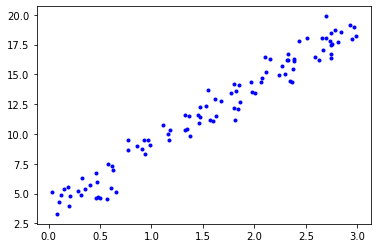

In [249]:
plt.plot(X, y, 'b.')
plt.show()

In [250]:
X_train, x_test, y_train, y_test = divide_train_and_test(X, y, 0.75)

In [251]:
X_poly = make_pow(X_train, 1)

In [252]:
X_data = insert_ones(X_poly)

In [253]:
X_data.shape

(75, 2)

In [254]:
X_data

array([[1.        , 2.3719931 ],
       [1.        , 0.96248626],
       [1.        , 2.59068933],
       [1.        , 2.94946834],
       [1.        , 1.57318383],
       [1.        , 0.47551971],
       [1.        , 1.32766331],
       [1.        , 2.83793002],
       [1.        , 0.08403457],
       [1.        , 1.85125195],
       [1.        , 2.81568356],
       [1.        , 1.97344335],
       [1.        , 2.00541355],
       [1.        , 1.116592  ],
       [1.        , 0.77232685],
       [1.        , 0.58119092],
       [1.        , 0.09683887],
       [1.        , 2.96629124],
       [1.        , 0.14559077],
       [1.        , 2.2392467 ],
       [1.        , 0.48282317],
       [1.        , 1.96603878],
       [1.        , 2.73522504],
       [1.        , 2.69266404],
       [1.        , 0.90320645],
       [1.        , 2.34216446],
       [1.        , 1.52962881],
       [1.        , 2.98849932],
       [1.        , 0.32242753],
       [1.        , 0.46578857],
       [1.

In [255]:
theta = gradient_descent(X_data, y_train, 0.1, 100)

In [256]:
y_predict = X_data.dot(theta)

In [257]:
y_predict

array([[15.9800725 ],
       [ 8.68473283],
       [17.11200263],
       [18.96897464],
       [11.84558748],
       [ 6.16428648],
       [10.57481991],
       [18.39167345],
       [ 4.13803378],
       [13.28481521],
       [18.27653004],
       [13.9172547 ],
       [14.08272638],
       [ 9.4823549 ],
       [ 7.7005039 ],
       [ 6.71122062],
       [ 4.20430643],
       [19.05604677],
       [ 4.45663701],
       [15.29300233],
       [ 6.20208781],
       [13.87893005],
       [17.860092  ],
       [17.63980433],
       [ 8.3779118 ],
       [15.8256851 ],
       [11.62015495],
       [19.17099155],
       [ 5.37191048],
       [ 6.11392   ],
       [16.07014367],
       [ 5.34374348],
       [ 6.63302599],
       [ 4.3061915 ],
       [14.59734955],
       [ 6.89546399],
       [13.21020695],
       [14.84208898],
       [14.40445886],
       [ 9.78563801],
       [15.58026282],
       [18.12997645],
       [ 7.11750529],
       [12.87562509],
       [17.5139657 ],
       [ 9

In [258]:
y_predict.shape

(75, 1)

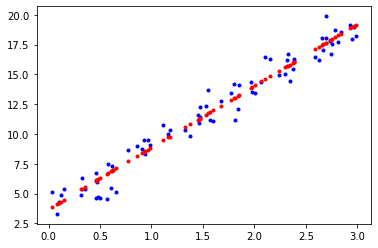

In [259]:
plt.plot(X_train, y_train, 'b.')
plt.plot(X_train, y_predict, 'r.')
plt.show()